## Content 

 <b>1 | Preprocessing Steps</b>
 
    1.1 Import Libraries
    1.2 Configure Settings
    1.3 Import Files
    1.4 Prepare Data

 <b>2 | Structure Investigation</b>
 
    2.1 Basic Steps
    2.2 Null Value Check
    2.3 Structure of non-numerical features
    2.4 Structure of numerical features
    
    
 <b>3 | Univariate Analysis</b>
 
    3.1 Summary for Columns (Describe)
    3.2 Individual Column Shape Observation
    3.3 Individual Column Value Observation (Min, Max and Outlier)

 <b>4 | Multivariate Analysis</b>
 
    4.1 Creating Relation Matrix and Graph
    4.2 Relation With Score
    4.3 Other Interesting Relationships (Leaving Score & Rank)
 
 
 <b>5 | Comparision Summary wrt Previous Reports</b>
 
    5.1 Coutries Performance Comparision wrt 2018
    5.2 Score Variation for Ranked 1 Country Over 5 year


### 1 | Preprocessing Steps

#### 1.1 | Import Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import math

#### 1.2 | Configure Settings

In [2]:
%matplotlib inline
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns',100)          # Set now of columns visible to 100
pd.set_option('display.max_rows',100)          # Set now of rows visible to 100

#### 1.3 | Import Files

In [3]:
df_raw_15=pd.read_csv("/Users/abhi011097/Workspace/Dataset_Analysis/4_World_Happiness_Report/Dataset/2015.csv")
df_raw_16=pd.read_csv("/Users/abhi011097/Workspace/Dataset_Analysis/4_World_Happiness_Report/Dataset/2016.csv")
df_raw_17=pd.read_csv("/Users/abhi011097/Workspace/Dataset_Analysis/4_World_Happiness_Report/Dataset/2017.csv")
df_raw_18=pd.read_csv("/Users/abhi011097/Workspace/Dataset_Analysis/4_World_Happiness_Report/Dataset/2018.csv")
df_raw_19=pd.read_csv("/Users/abhi011097/Workspace/Dataset_Analysis/4_World_Happiness_Report/Dataset/2019.csv")

#### 1.4 | Prepare Data

In [4]:
df_raw_19.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [5]:
df=df_raw_19.copy()

df_raw_15['Year']='2015'
df_raw_16['Year']='2016'
df_raw_17['Year']='2017'
df_raw_18['Year']='2018'
df_raw_19['Year']='2019'


df_combined= pd.concat([
df_raw_15[['Happiness Rank','Happiness Score','Country','Year']].rename(columns = {'Happiness Rank':'Rank','Happiness Score':'Score'}),
df_raw_16[['Happiness Rank','Happiness Score','Country','Year']].rename(columns = {'Happiness Rank':'Rank','Happiness Score':'Score'}),
df_raw_17[['Happiness.Rank','Happiness.Score','Country','Year']].rename(columns = {'Happiness.Rank':'Rank','Happiness.Score':'Score'}) ,
df_raw_18[['Overall rank','Score','Country or region','Year']].rename(columns = {'Country or region':'Country','Overall rank':'Rank'}),
df_raw_19[['Overall rank','Score','Country or region','Year']].rename(columns = {'Country or region':'Country','Overall rank':'Rank'})]
,ignore_index=True, axis=0)

### 2 | Structure Investigation

#### 2.1 | Basic Steps

In [6]:
df.shape

(156, 9)

In [7]:
df.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [8]:
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [10]:
pd.value_counts(df.dtypes)

float64    7
int64      1
object     1
dtype: int64

***
#### 2.2 | Null Value Check
* No null values Observed
***

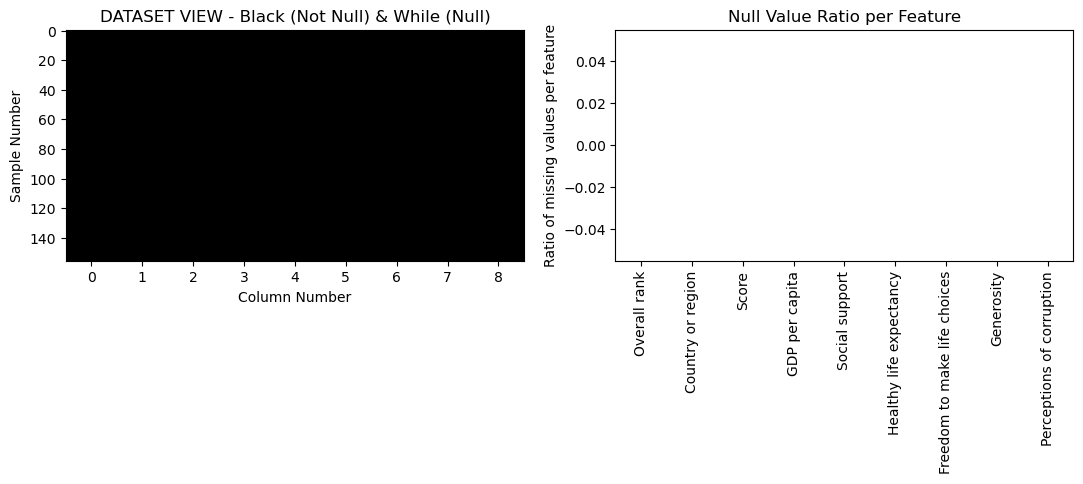

In [11]:
# Combined Plot

plt.subplots(1,2,figsize=(13,3))
plt.subplot(1,2,1)
plt.imshow(df.isna(), aspect="auto", interpolation="nearest", cmap="gray") # we can test any condition in df using this graph
plt.xlabel("Column Number")
plt.ylabel("Sample Number")
plt.title("DATASET VIEW - Black (Not Null) & While (Null)")
plt.subplot(1,2,2)
df.isna().mean().sort_values().plot( kind="bar", title="Null Value Ratio per Feature", ylabel="Ratio of missing values per feature")
plt.show()

***
#### 2.3 | Structure of non-numerical features
* Only 1 non numerical column
* Column value is nominal type
* Has all distinct values
***


In [12]:
# non-numerical features
df.select_dtypes(exclude="number").head()

,Country or region
0,Finland
1,Denmark
2,Norway
3,Iceland
4,Netherlands


In [13]:
# All Values are Unique
df.describe(exclude="number")

,Country or region
count,156
unique,156
top,Finland
freq,1


#### 2.4 | Structure of numerical features

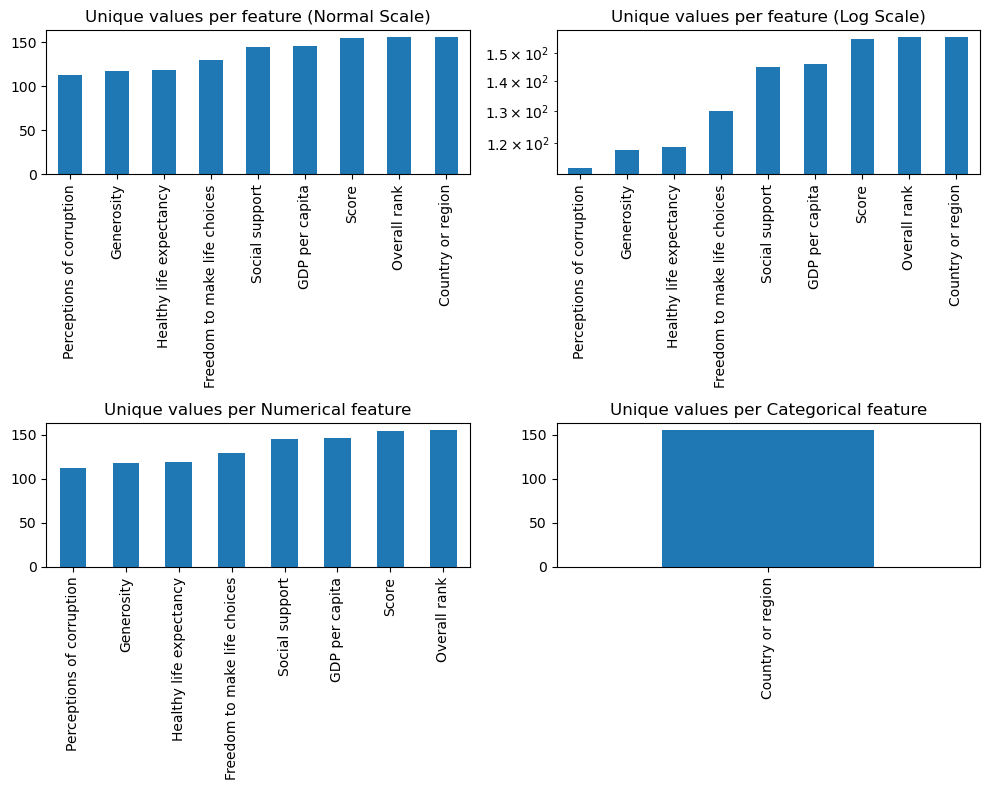

In [14]:
# Combined Plot

plt.subplots(2,2,figsize=(10,8),squeeze=False)
plt.subplot(2,2,1)
df.nunique().sort_values().plot.bar(  title="Unique values per feature (Normal Scale)")
plt.subplot(2,2,2)
df.nunique().sort_values().plot.bar( logy=True, title="Unique values per feature (Log Scale)")

plt.subplot(2,2,3)
df.select_dtypes(include="number").nunique().sort_values().plot.bar(title="Unique values per Numerical feature");
plt.subplot(2,2,4)
df.select_dtypes(exclude="number").nunique().sort_values().plot.bar(title="Unique values per Categorical feature");
plt.tight_layout()
plt.show()

***
#### 2.5 | Value Behaviour

* Each point in this figure is a sample (i.e. a row) in our dataset and each subplot represents a different feature. 
* The y-axis shows the feature value, while the x-axis is the sample index
***

* Observation

    * Values in each subpots appear to be in range 
    * No extreme values / Wrong Value observed 
***

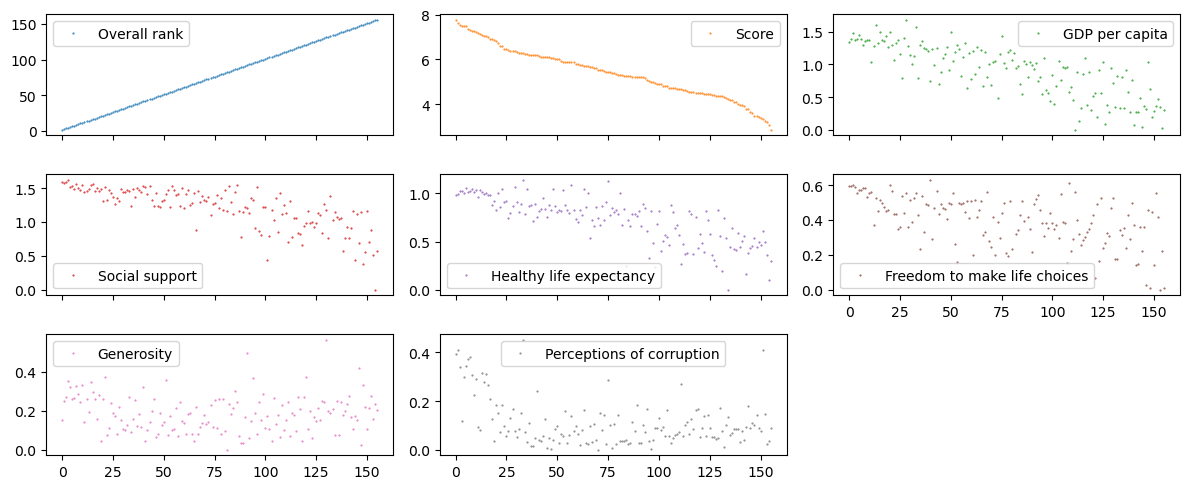

In [15]:
# For all Numerical columnn for all rows 
df.plot(lw=0, marker=".", subplots=True, layout=(-1, 3),
          figsize=(12,5), markersize=1)
plt.tight_layout()

### 3 | Univariate Content Analysis

#### 3.1 | Summary for Columns (Describe)

In [16]:
df.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


***
#### 3.2 | Individual Column Shape 

***
* Approximately symmetric
    * Score
    * GDP per capita
***

* Moderately Skewed
    * Healthy life expectancy (Presence of low values causing left skewness)
    * Freedom to make life choices (Presence of low values causing left skewness)
    * Generosity (Presence of High values causing right skewness)
***
* Highly Skewed
    * Social support (Presence of low values causing left skewness)
    * Perceptions of corruption (Presence of High values causing right skewness)

***

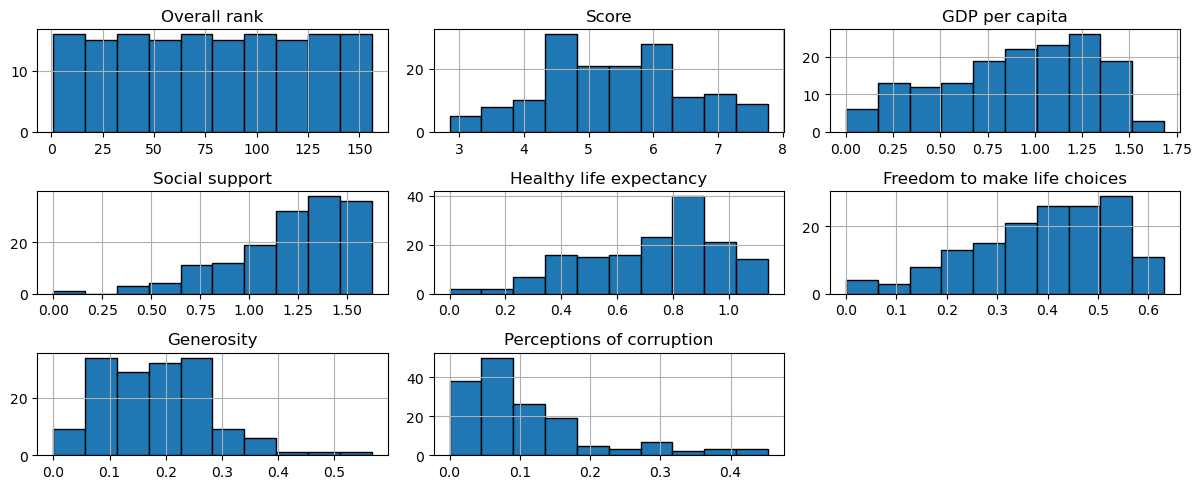

In [17]:
# Plots the histogram for each numerical feature in a separate subplot
figsize_val=(12,5)
layout_val=(-1, 3)
df.hist(bins=10, figsize=figsize_val, layout=layout_val, edgecolor="black")
plt.tight_layout();

In [ ]:
df.skew()

Overall rank                    0.000000
Score                           0.011450
GDP per capita                 -0.385232
Social support                 -1.134728
Healthy life expectancy        -0.613841
Freedom to make life choices   -0.685636
Generosity                      0.745942
Perceptions of corruption       1.650410
dtype: float64

***
#### 3.3 | Individual Column Value Observation (Min, Max and Outlier)

* We have used min/max for finding corners ,  box plot to visualise and iqr method to list outlier countries
* Finland which is ranked 1 does not top any individual column
* Below is the min max and outlier for all columns    
 
<b> GDP per capita </b>
* Min Value -> 4.668 | Country ->  Somalia
* Max Value -> 6.374 | Country ->  Qatar
* Outliers -> None 

***

<b>Social support</b>
* Min Value -> 3.083 | Country ->  Central African Republic
* Max Value -> 7.494 | Country ->  Iceland
* Outliers ->  Benin, Burundi, Syria, Central African Republic

 **********

<b>Healthy life expectancy</b> 
* Min Value -> 4.212 | Country ->  Swaziland
* Max Value -> 6.262 | Country ->  Singapore
* Outliers ->  Swaziland

 **********

<b>Healthy life expectancy</b> 
* Min Value -> 3.203 | Country ->  Afghanistan
* Max Value -> 6.174 | Country ->  Uzbekistan
* Outliers ->  Afghanistan

 **********

<b>Generosity</b>
* Min Value -> 5.287 | Country ->  Greece
* Max Value -> 4.36 | Country ->  Myanmar
* Outliers ->  Indonesia, Myanmar

 **********

<b>Perceptions of corruption</b> 
* Min Value -> 5.529 | Country ->  Moldova
* Max Value -> 6.262 | Country ->  Singapore
* Outliers ->  Finland, Denmark, Norway, Netherlands, Switzerland, Sweden, New Zealand, Canada, Australia, Luxembourg, Ireland, Singapore, Hong Kong, Rwanda

 ********** 

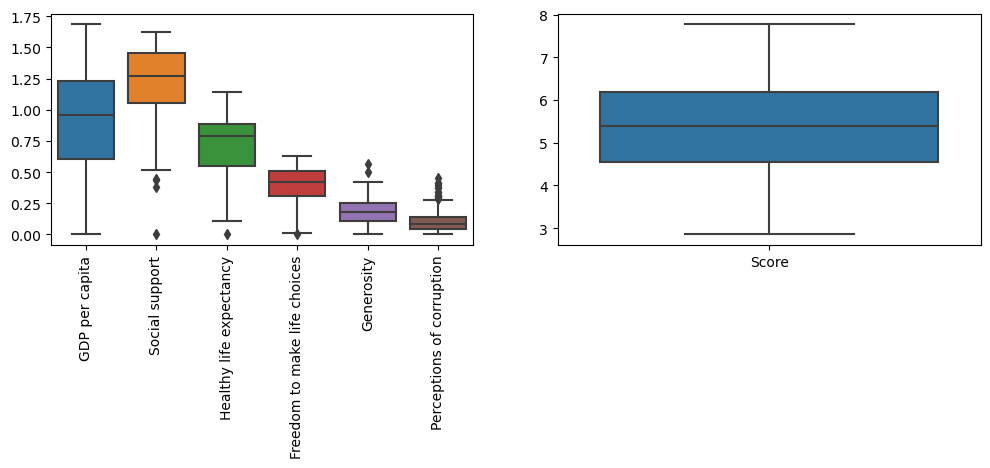

In [19]:
plt.subplots(1,2,figsize=(12,3))

plt.subplot(1,2,1)
sns.boxplot(data=df[[ 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption']])
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.boxplot(data=df[[ 'Score']])

plt.show()

In [20]:
upper =df.quantile(0.75)+1.5 *(df.quantile(0.75)-df.quantile(0.25))
lower = df.quantile(0.25)-1.5 *(df.quantile(0.75)-df.quantile(0.25))

for i in [ 'GDP per capita','Social support', 'Healthy life expectancy','Freedom to make life choices', 'Generosity','Perceptions of corruption']:
    temp_min=df[df[i]== df[i].min()][['Country or region','Score']]
    temp_max=df[df[i]== df[i].max()][['Country or region','Score']]
    
    print('\nColumn -> ',i,'\nMin Value ->',temp_min['Score'].values[0],'| Country -> ',
          str(temp_min['Country or region'].to_list()).replace("'",'').replace('[','').replace(']',''))
    
    print('Max Value ->',temp_max['Score'].values[0],'| Country -> ',
          str(temp_max['Country or region'].to_list()).replace("'",'').replace('[','').replace(']',''))
    
    x= df[ (df[i]<round(lower[i],2)) |  (df[i]>round(upper[i],2))]['Country or region'].to_list()
    print('Outliers -> ',str(x).replace("'",'').replace('[','').replace(']',''))
    print('\n','*'*10)


Column ->  GDP per capita 
Min Value -> 4.668 | Country ->  Somalia
Max Value -> 6.374 | Country ->  Qatar
Outliers ->  

 **********

Column ->  Social support 
Min Value -> 3.083 | Country ->  Central African Republic
Max Value -> 7.494 | Country ->  Iceland
Outliers ->  Benin, Burundi, Syria, Central African Republic

 **********

Column ->  Healthy life expectancy 
Min Value -> 4.212 | Country ->  Swaziland
Max Value -> 6.262 | Country ->  Singapore
Outliers ->  Swaziland

 **********

Column ->  Freedom to make life choices 
Min Value -> 3.203 | Country ->  Afghanistan
Max Value -> 6.174 | Country ->  Uzbekistan
Outliers ->  Afghanistan

 **********

Column ->  Generosity 
Min Value -> 5.287 | Country ->  Greece
Max Value -> 4.36 | Country ->  Myanmar
Outliers ->  Indonesia, Myanmar

 **********

Column ->  Perceptions of corruption 
Min Value -> 5.529 | Country ->  Moldova
Max Value -> 6.262 | Country ->  Singapore
Outliers ->  Finland, Denmark, Norway, Netherlands, Switzerland,

### 4 | Multivariate Investigation

#### 4.1 | Creating Relation Matrix and Graph

* Keeping score out of the rank and score since strong correlation. (Score decides rank)

In [21]:
temp_corr=df.corr()
temp_corr

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Overall rank,1.000000,-0.989096,-0.801947,-0.767465,-0.787411,-0.546606,-0.047993,-0.351959
Score,-0.989096,1.000000,0.793883,0.777058,0.779883,0.566742,0.075824,0.385613
GDP per capita,-0.801947,0.793883,1.000000,0.754906,0.835462,0.379079,-0.079662,0.298920
Social support,-0.767465,0.777058,0.754906,1.000000,0.719009,0.447333,-0.048126,0.181899
Healthy life expectancy,-0.787411,0.779883,0.835462,0.719009,1.000000,0.390395,-0.029511,0.295283
Freedom to make life choices,-0.546606,0.566742,0.379079,0.447333,0.390395,1.000000,0.269742,0.438843
Generosity,-0.047993,0.075824,-0.079662,-0.048126,-0.029511,0.269742,1.000000,0.326538
Perceptions of corruption,-0.351959,0.385613,0.298920,0.181899,0.295283,0.438843,0.326538,1.000000


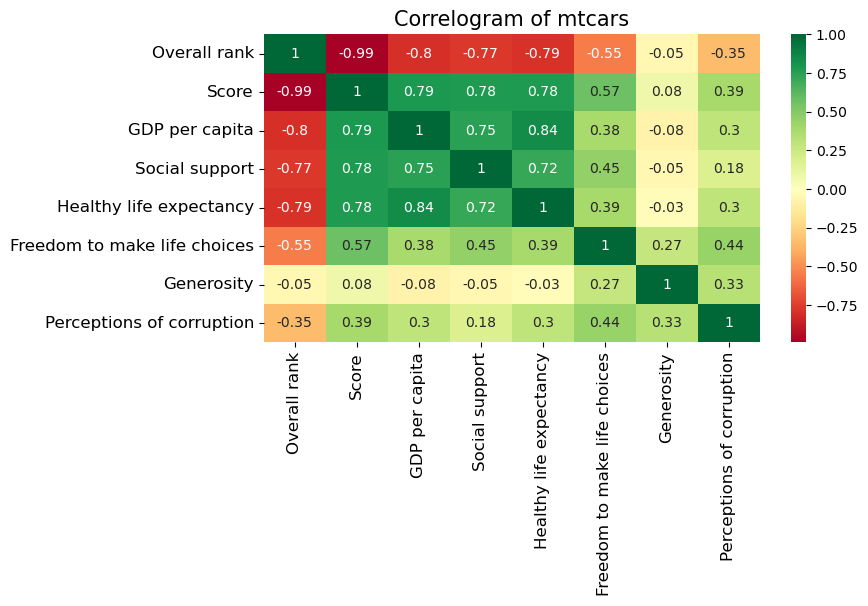

In [22]:
# Plot
plt.figure(figsize=(8,4))
sns.heatmap(df.corr().round(2), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('Correlogram of mtcars', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


In [23]:
temp_corr.drop(columns='Overall rank',index='Overall rank',inplace=True)

#### 4.2 | Relation With Score

    * Strong          ->  'GDP per capita', 'Social support', 'Healthy life expectancy'

    * Moderate        ->  'Freedom to make life choices'

    * Weak            ->  'Perceptions of corruption'

    * No_relationship ->  'Generosity' 

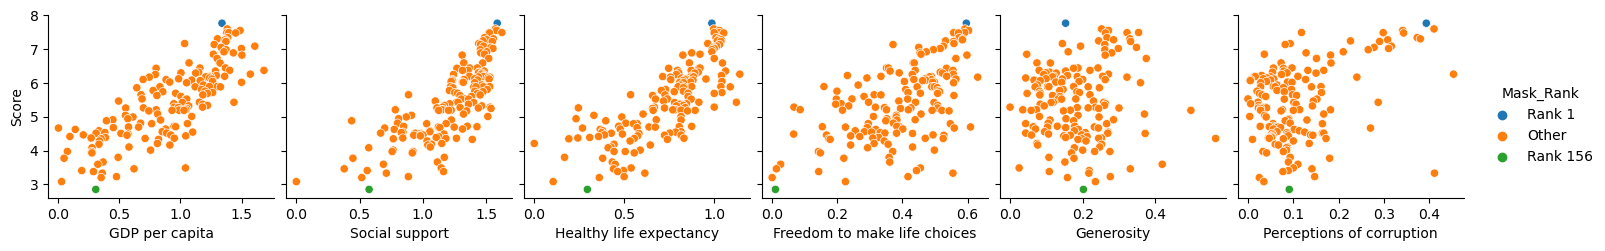

In [24]:
# Observing relationship type with corr values

df['Mask_Rank']=np.where(df['Overall rank']==1,'Rank 1','Other')
df['Mask_Rank']=np.where(df['Overall rank']==156,'Rank 156',df['Mask_Rank'])

sns.pairplot(data=df,
                  y_vars='Score',
                  x_vars=['GDP per capita', 'Social support', 'Healthy life expectancy','Freedom to make life choices',
                          'Generosity','Perceptions of corruption']
                ,hue='Mask_Rank'
)
                  
plt.show()


* We can see first 3 plots show + relationship and points are also close enough (Seems to have strong relationship)
* Freedom to make life choices has a positive relationship but points are not closed enough indicating moderate relationship
* Generosity does not seems to have any relation (Even the least rank country has better generosity score then rank 1)
* cluster of few points seems to show +ve relationship  thus week positive relation with score

In [25]:
temp_corr_score=temp_corr.iloc[[0]]
#temp_corr_score.drop(columns='Score',inplace=True)

In [26]:
# Observing relationship type with corr values

temp_corr_score.drop(columns='Score',inplace=True)
strong=[]
moderate=[]
weak=[]
no_relationship=[]
for y in temp_corr_score.columns:
    p=temp_corr_score[y][0]
    if p >= 0.75 or p <= -0.75:
        strong.append(y)
    elif p >= 0.50 or p <= -0.50:
        moderate.append(y)
    elif p >= 0.25 or p <= -0.25:
        weak.append(y)
    else :
        no_relationship.append(y)

In [27]:
print('\nStrong -> ',strong)
print('\nModerate -> ',moderate)
print('\nWeak -> ',weak)
print('\nNo_relationship -> ',no_relationship)


Strong ->  ['GDP per capita', 'Social support', 'Healthy life expectancy']

Moderate ->  ['Freedom to make life choices']

Weak ->  ['Perceptions of corruption']

No_relationship ->  ['Generosity']


***************

#### 4.3 | Other Interesting Relationships (Leaving Score & Rank)

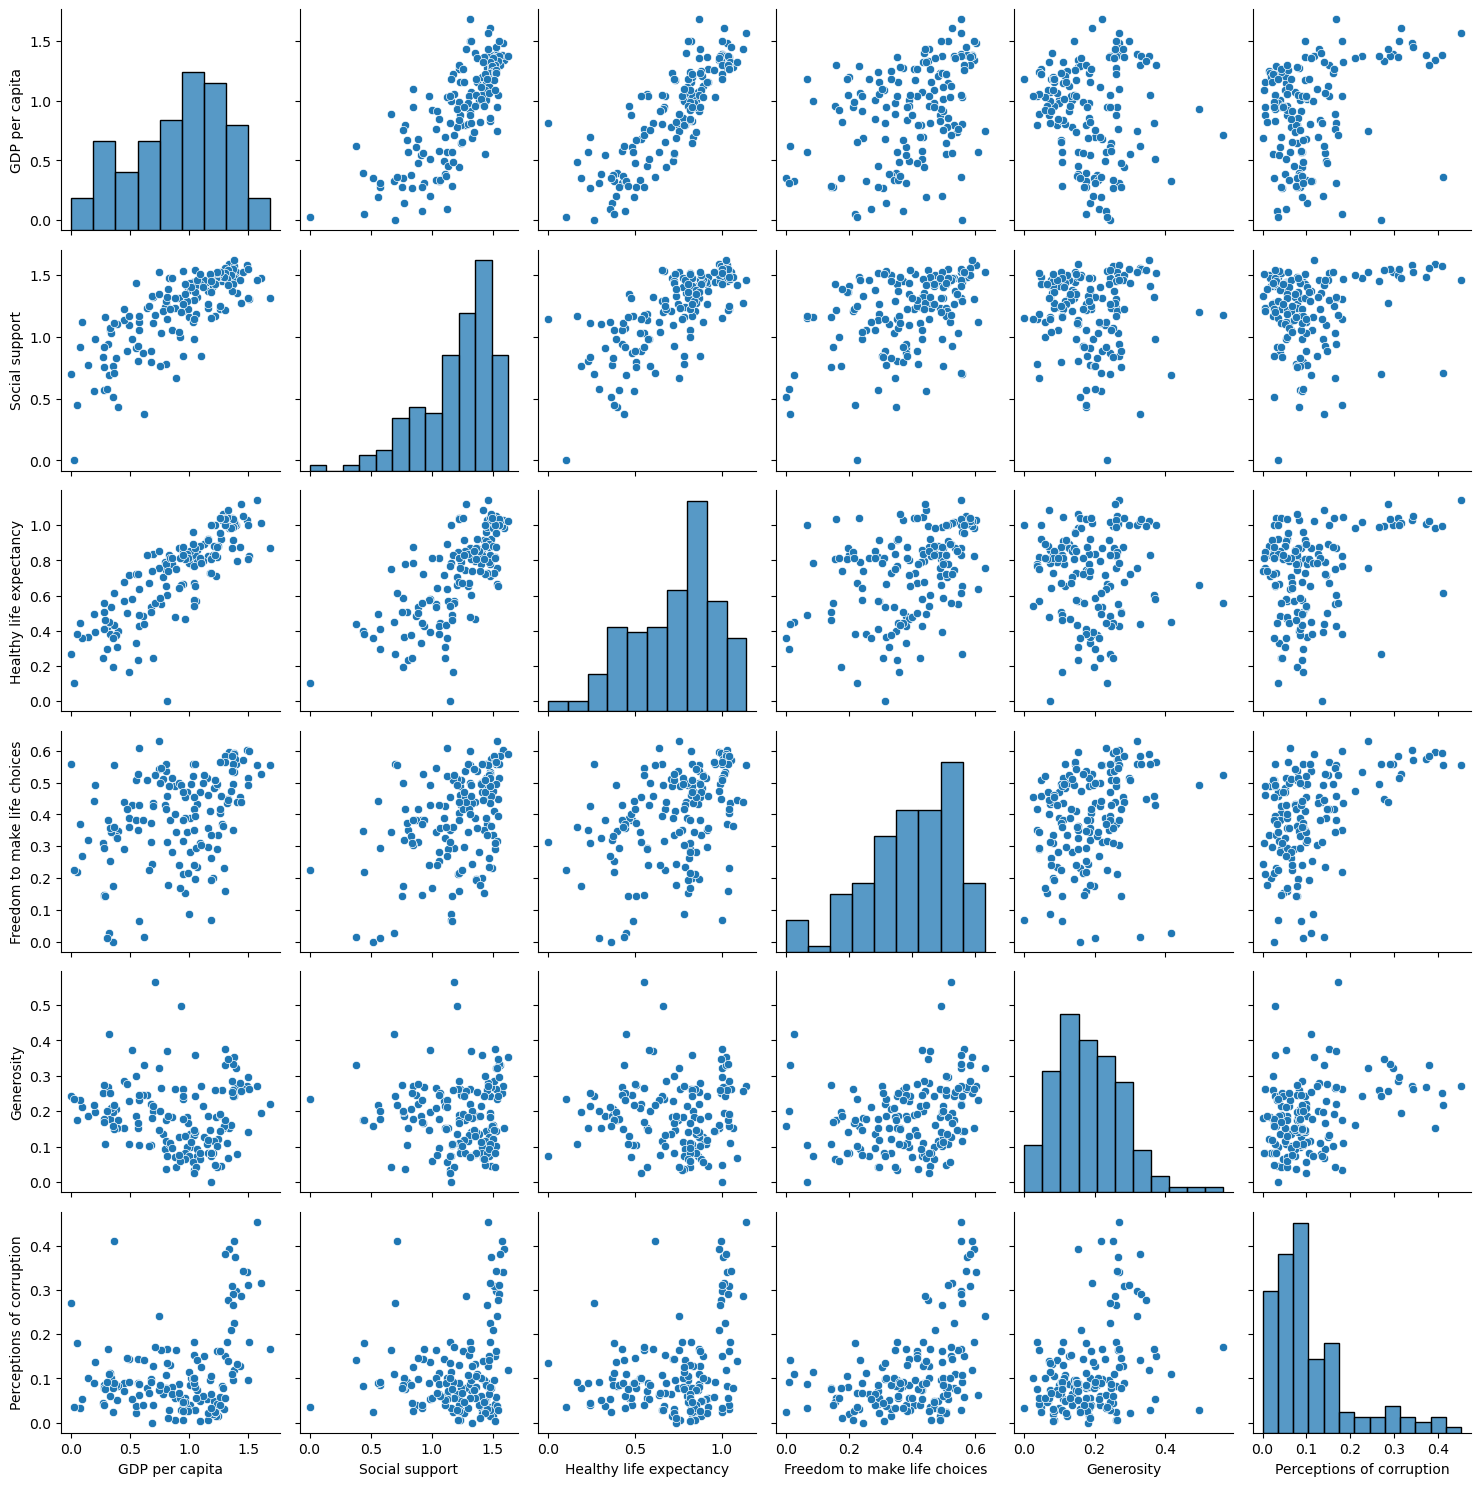

In [36]:
sns.pairplot(df[temp_corr.columns])
plt.tight_layout()

  * GDP per capita shows strong relationship with 'Social support' & 'Healthy life expectancy' as point are close enough in +ve direction
  * Social support and Healthy life expectancy shows moderate +ve relationship with points not much closed enough to be commented as strong
  * Generosity , Perceptions of corruption and Freedom to make life choices does not have any strong or moderate relationship

In [37]:
temp_corr=df.corr()
temp_corr.drop(columns=['Overall rank','Score'],index=['Overall rank','Score'],inplace=True)
res = [(a, b) for idx, a in enumerate(temp_corr.index) for b in temp_corr.index[idx + 1:]]

strong=[]
moderate=[]
weak=[]
no_relationship=[]
for x,y in res:
    p=temp_corr[x][y]
    if p >= 0.75 or p <= -0.75:
        strong.append((x,y))
    elif p >= 0.50 or p <= -0.50:
        moderate.append((x,y))
    elif p >= 0.25 or p <= -0.25:
        weak.append((x,y))
    else :
        no_relationship.append((x,y))
    
print('\nStrong -> ',strong)
print('\nModerate -> ',moderate)
print('\nWeak -> ',weak)
print('\nNo_relationship -> ',no_relationship)


Strong ->  [('GDP per capita', 'Social support'), ('GDP per capita', 'Healthy life expectancy')]

Moderate ->  [('Social support', 'Healthy life expectancy')]

Weak ->  [('GDP per capita', 'Freedom to make life choices'), ('GDP per capita', 'Perceptions of corruption'), ('Social support', 'Freedom to make life choices'), ('Healthy life expectancy', 'Freedom to make life choices'), ('Healthy life expectancy', 'Perceptions of corruption'), ('Freedom to make life choices', 'Generosity'), ('Freedom to make life choices', 'Perceptions of corruption'), ('Generosity', 'Perceptions of corruption')]

No_relationship ->  [('GDP per capita', 'Generosity'), ('Social support', 'Generosity'), ('Social support', 'Perceptions of corruption'), ('Healthy life expectancy', 'Generosity')]


### 5 | Comparision Summary wrt Previous Reports 

***
#### 5.1 | Coutries Performance Comparision wrt 2018

* Top 5 countries with most improved performance
    * Benin, Guinea, Niger, Kosovo, 'Bosnia and Herzegovina'
    
***    
* 5 countries with worst performance 
    * Malaysia , Turkmenistan, Argentina, Sierra Leone, Egypt
***
* Countries with no change in rank
    * Finland, Iceland, New Zealand, Malta, Singapore, Latvia, Jamaica, Kazakhstan, Peru, Hong Kong, Mozambique, Togo, Madagascar, Tanzania, Central African Republic

***

In [30]:
temp_f=df_combined[df_combined['Year']=='2019'].merge(df_combined[df_combined['Year']=='2018'],left_on='Country', right_on='Country')
temp_f['Change']=temp_f['Rank_y']-temp_f['Rank_x']

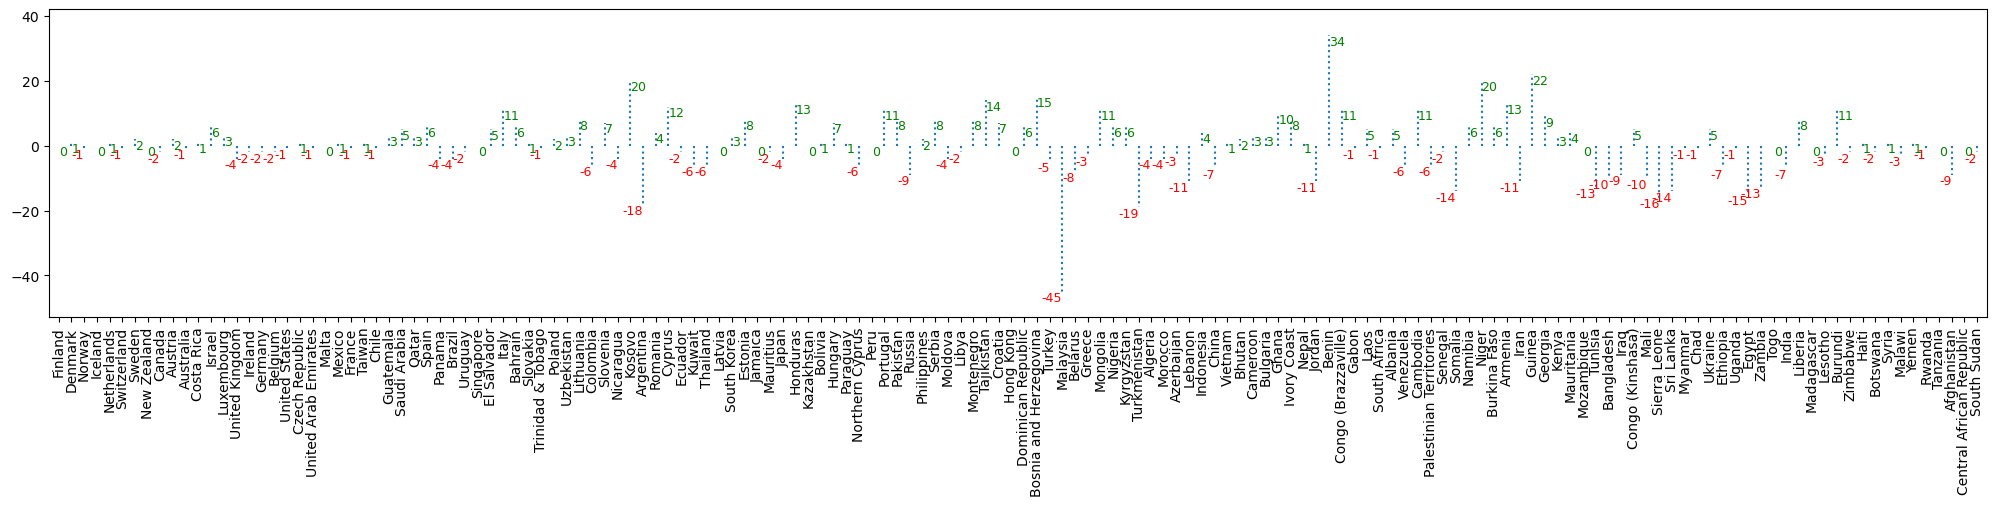

In [31]:
plt.figure(figsize=(25,4))
plt.vlines(x=temp_f['Country'], ymin=0, ymax=temp_f.Change,linestyles='dotted')

for i, val in enumerate(temp_f.Change):
    plt.text(i, val, val, horizontalalignment='right' if val < 0 else 'left', 
             verticalalignment='top', fontdict={'color':'red' if val < 0 else 'green','fontweight':300, 'size':9})

plt.xticks(rotation=90)
plt.margins(x=0.005,y=0.1)
plt.show()

In [32]:
#Top 5 performing Countries
temp_f[['Country','Change']].sort_values('Change',ascending=False)[0:5].reset_index(drop=True)

,Country,Change
0,Benin,34
1,Guinea,22
2,Niger,20
3,Kosovo,20
4,Bosnia and Herzegovina,15


In [33]:
# Top 5 worst performing Countries
temp_f[['Country','Change']].sort_values('Change',)[0:5].reset_index(drop=True)

,Country,Change
0,Malaysia,-45
1,Turkmenistan,-19
2,Argentina,-18
3,Sierra Leone,-16
4,Egypt,-15


In [34]:
# Consistent Countries with change 0
print(str(temp_f[temp_f['Change']==0]['Country'].to_list()).replace("'",'').replace('[','').replace(']',''))

Finland, Iceland, New Zealand, Malta, Singapore, Latvia, Jamaica, Kazakhstan, Peru, Hong Kong, Mozambique, Togo, Madagascar, Tanzania, Central African Republic


#### 5.2 | Score Variation for Ranked 1 Country Over 5 year

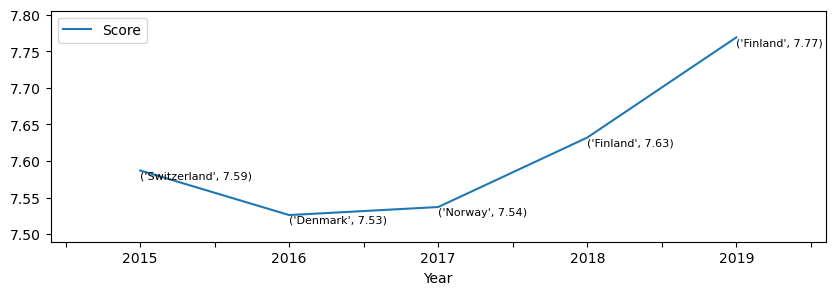

In [35]:
df_combined[df_combined['Rank']==1][['Year','Score']].plot.line(x='Year',y='Score',figsize=(10,3))
for i, val in enumerate((df_combined[df_combined['Rank']==1][['Year','Score','Country']].sort_values('Year')).astype(np.str).agg('-'.join, axis=1).to_list()):
    plt.text(i, float(val.split('-')[1]), (str(val.split('-')[2]),round(float(val.split('-')[1]),2)),
         horizontalalignment='left', verticalalignment='top', fontdict={'fontweight':300, 'size':8})
plt.margins(x=0.15,y=0.15)
plt.show()